In [2]:
import os
import matplotlib.pyplot as plt

from glob import glob
from defaults import CHECKED_FOLDER, PROCESSED_FOLDER, DATA_FOLDER, SCENES_FOLDER

In [6]:
# scenes_files = [os.path.basename(path).replace(".mp4", "") for path in glob(f"{SCENES_FOLDER}/*")]
# # scenes_files = [path for path in glob(f"{SCENES_FOLDER}/*")]
# checked_files = [os.path.basename(path).replace(".json", "") for path in glob(f"{CHECKED_FOLDER}/*")]
# # checked_files = [path for path in glob(f"{CHECKED_FOLDER}/*")]
# processed_files = [os.path.basename(path).replace(".json", "") for path in glob(f"{PROCESSED_FOLDER}/*")]
processed_files = [path for path in glob(f"{PROCESSED_FOLDER}/*")]

(829, 4819, 5048, 828)

In [51]:
# check how the processsed information has been stored
import json
file = json.load(open(processed_files[120], "r"))

In [53]:
len(file["features"]), processed_files[120]


(122, '../processed/Bir Toqsan - Үлкен Интервью-btGmcttVRDM-Scene-217.json')

In [68]:
processed_files[0]
from decord import VideoReader, cpu

scene = VideoReader("../scenes/Bir Toqsan - Үлкен Интервью-btGmcttVRDM-Scene-217.mp4", ctx=cpu(0))
features = json.load(open("../processed/Bir Toqsan - Үлкен Интервью-btGmcttVRDM-Scene-217.json", "r"))



In [81]:
# track the face and extract clip from that
for itr in range(len(scene)):
    frame = scene[itr].asnumpy()
    feature = features["features"][itr]
    if itr == 100:
        break

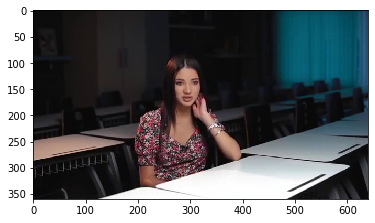

In [82]:
plt.imshow(frame)

In [84]:
def draw_on_image(frame, frame_feature):

    frame = resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    for rect, shape in zip(frame_feature["rects"], frame_feature["shape"]):
        x, y, w, h = rect
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 0), 2)

        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)

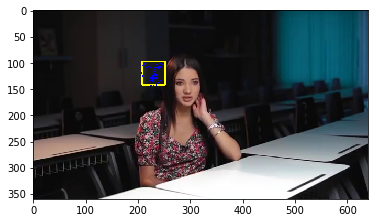

In [85]:
import cv2
from imutils import face_utils 

plt.imshow(draw_on_image(frame, feature["rects"], feature["shape"]))